# Upload nexus file from published dataset

We upload a file we downloaded from the HZB data publication service
The data access is enabled to all the users after the embargo of 5 years
Here for semplicity we upload the .nxs from publication as local file <br>
https://data.helmholtz-berlin.de/pub/ND000001

We use a package in Python to upload Nexus files : NeXpy, nexusformat https://nexpy.github.io

We can run the program from command line and use the GUI; https://nexpy.github.io/nexpy/pythongui.html

In [4]:
!nexpy /home/luigia//Documents/metadata_course/data_public1_HZB/2021-03-Dy01Cp02_2.nxs

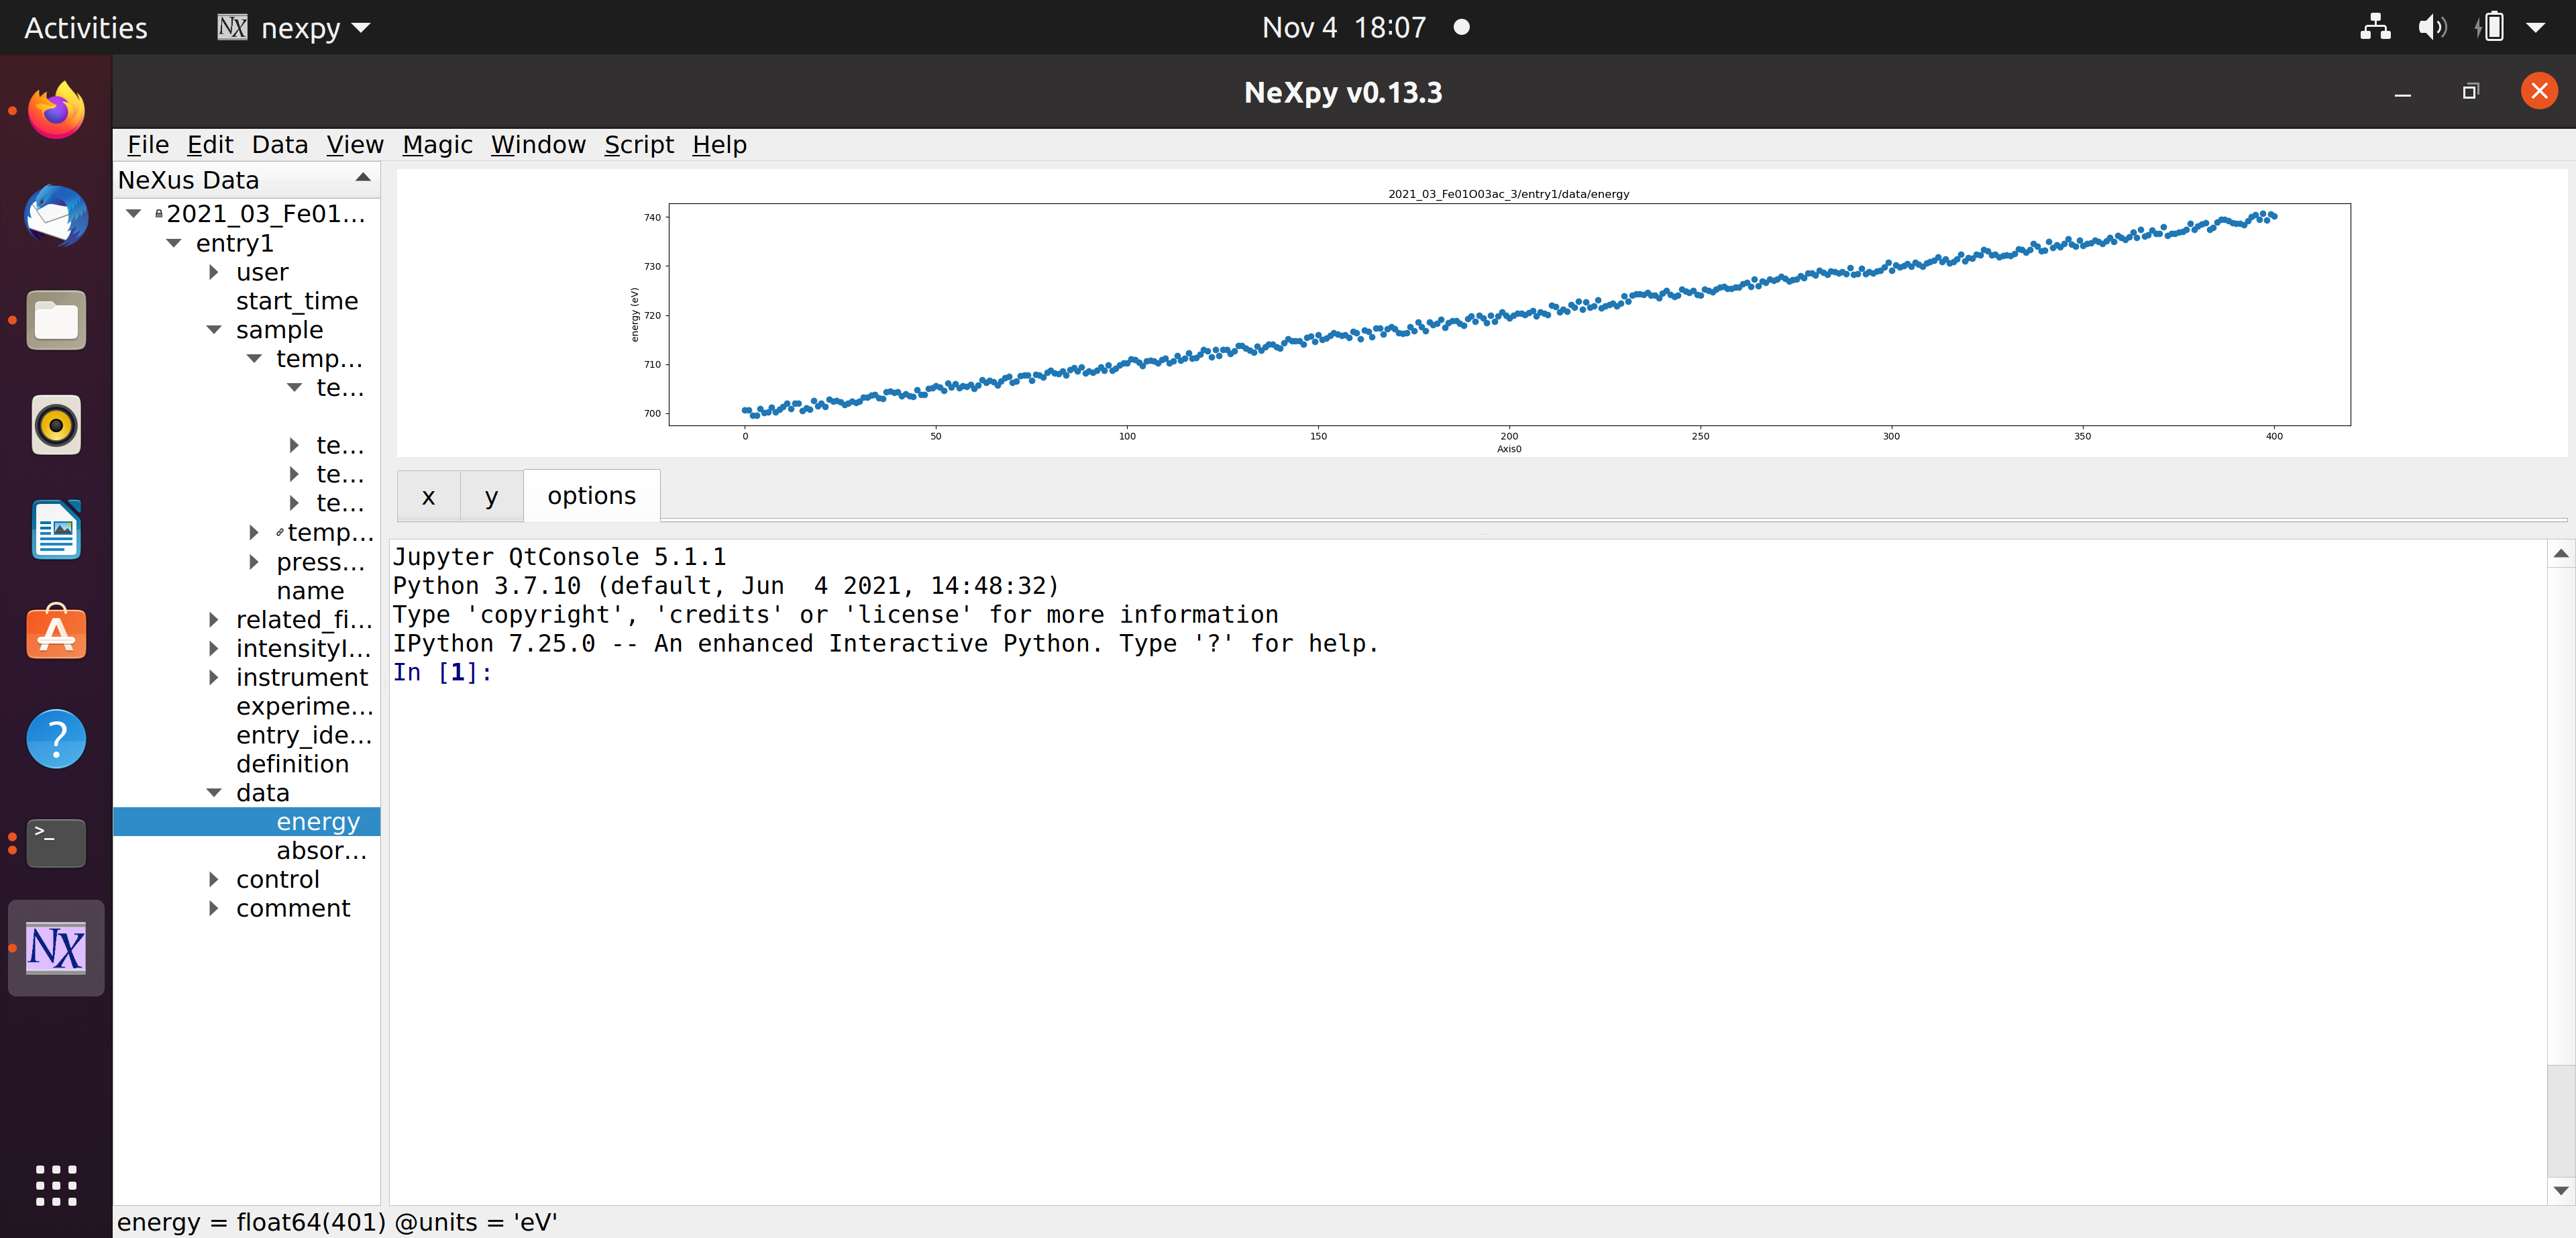

In [6]:
from IPython.display import Image

Image(filename='/home/luigia/Pictures/Nexpy_plot1.png')

In [7]:
from nexusformat.nexus import *
datapath='/home/luigia/Documents/metadata_course/data_public1_HZB/'
filename='./D2O_E2_data.nxs'
a=nxload(datapath+filename)

# 1. Understand more on the file structure

In [8]:
print(a)

root


In [9]:
print(a.tree)

root:NXroot
  @HDF5_Version = '1.8.8'
  @NeXus_version = '4.2.0'
  @file_copy = 'D:\Projects\D2O\fc3.nxs'
  @file_name = 'D:\Projects\D2O\2012-12\fc mode data\fc3_del_p...'
  @file_time = '2012-12-14T10:34:27+01:00'
  entry_1:NXentry
    E2:NXinstrument
      ADET1:NXdetector
        active_window = int16(4)
        board_parameter:CARdirectory
          DSP_buffer = float64(1442)
            @description = 'Size of DSP buffer'
            @units = 'kWords'
          RAW_mode = float64(1442)
            @description = 'RAW Mode on(1)/off(0)'
          TDC_trigger_latency = float64(1442)
            @description = '106 approx. 4.5 ns'
          TDL_X_DSP = float64(1442)
            @description = 'Peak center'
            @units = 'channel'
          TDL_X_FPGA = float64(1442)
            @description = 'Peak center'
            @units = 'channel'
          TDL_Y_DSP = float64(1442)
            @description = 'Peak center'
            @units = 'channel'
          TDL_Y_FPGA = float64(14

Parse the structure/ extract specific elements

In [10]:
`NXentry` is the root level of a `Nexus` file 

SyntaxError: invalid syntax (<ipython-input-10-4cb7c53c5265>, line 1)

In [ ]:
print(a.entry_1.tree)

In [9]:
print(a.entry_1.sample.beam.monochromator.keys())

dict_keys(['monochromator_changer', 'omega', 'tilting', 'translation', 'wavelength'])


In NeXus files is possible to create links to other elements of the structure or to external files

In [10]:
print(a.entry_1.datacollector.config_file)

/datacollector/application/configuration/E2_inst.xml


# 2. Identify fields, groups and NXdata group

In [ ]:
a['entry_1/E2']

NXinstrument include a collection of the instrument or beamline components

In [12]:
a['entry_1']

NXentry('entry_1')

NXentry describes the measurements

In [13]:
a['entry_1/sample']

NXsample('sample')

NXsample contains the sample description

In [14]:
a['entry_1/caress']

NXgroup('caress')

In [17]:
a.entry_1.caress.keys()

dict_keys(['BLS', 'PROT_BEG', 'PROT_END', 'READ', 'RELA', 'SETV', 'SETVALUE', 'SOF', 'TMO', 'TOL', 'WINDA', 'corbadevice', 'date', 'device_log', 'hardware_modules', 'protocol', 'protocol_time', 'steps', 'time', 'unused'])

In [20]:
a.entry_1.caress.time[0]

NXfield('23:19:45, 10:29:56')

In [6]:
a.entry_1.caress.time='23:19:45, 10:29:56'

NameError: name 'a' is not defined

In [15]:
a['entry_1/E2/monochromator']

NXcrystal('monochromator')

Further reading at https://manual.nexusformat.org/classes/index.html 

https://manual.nexusformat.org/classes/base_classes/index.html#base-class-definitions

# 3. Data visualization

Further data visualization and processing can be done in:

    NexPy
    
    hdfview
    
    Dawn www.dawnsci.org
    
    Matlab www.matworks.com; 
           https://manual.nexusformat.org/examples/matlab/index.html

# 4. Data manipulation

Array operation, similarly with NumPy array can be done with NXdata groups and NXfields (array +metadata)

It is possible to add an image to the NeXus files

https://manual.nexusformat.org/examples/epics/index.html

# 5. Format conversion of the metadata

The metadata structure can be converted to an xml file or json dictionary.

It is always possible to save the array of data in ascii
NeXus-JSON 
https://github.com/ess-dmsc/nexus-json

or using nxconvert from nexusformat project

# 7. Nexus files archiving

# 6. Nexus files validator

In [ ]:
NXarchive is an application for data to be archived in ICAT
it calls the groups
NXentry, NXinstrument, NXsample, NXsource, NXuser

In [ ]:
punx validate ./filename